### Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
import pickle

Loading the Dataset

In [3]:
df=pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [6]:
df.shape

(1275, 23)

In [7]:
# Checking if any values are null or not.
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [8]:
# Select only object-type columns
object_cols = df.select_dtypes(include='object')

# Loop through each object column and print unique and nunique
for col in object_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {object_cols[col].nunique()}")
    print(f"Unique values:\n{object_cols[col].unique()}")


Column: Company
Number of unique values: 19
Unique values:
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Column: Product
Number of unique values: 618
Unique values:
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv 

In [9]:
df.loc[999]

Company                              HP
Product                   EliteBook 840
TypeName                      Ultrabook
Inches                             14.0
Ram                                   8
OS                           Windows 10
Weight                             1.48
Price_euros                      2089.0
Screen                          Full HD
ScreenW                            1920
ScreenH                            1080
Touchscreen                          No
IPSpanel                             No
RetinaDisplay                        No
CPU_company                       Intel
CPU_freq                            2.7
CPU_model                 Core i7 7500U
PrimaryStorage                      512
SecondaryStorage                      0
PrimaryStorageType                  SSD
SecondaryStorageType                 No
GPU_company                       Intel
GPU_model               HD Graphics 620
Name: 999, dtype: object

# EDA

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_17548\265933121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Company',palette='Set1')


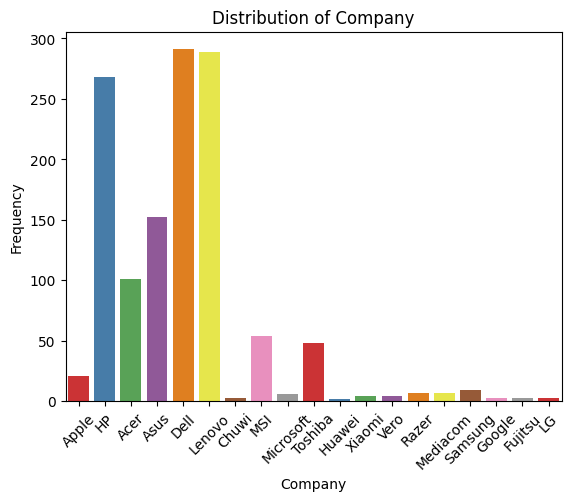

In [10]:
sns.countplot(df,x='Company',palette='Set1')
plt.title('Distribution of Company')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_17548\2578766552.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='TypeName',palette='Set1')


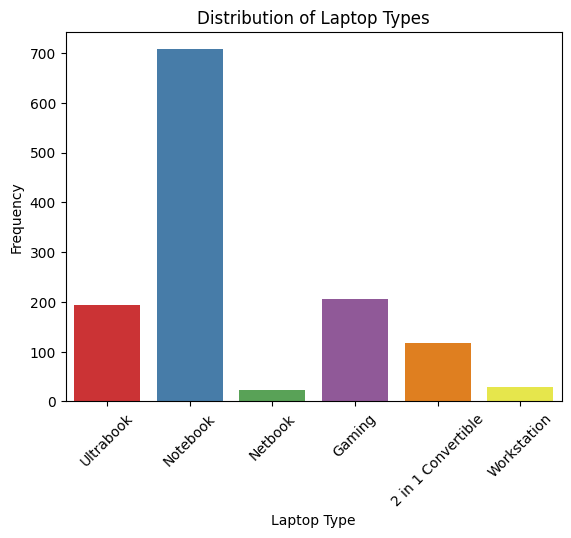

In [11]:
sns.countplot(df,x='TypeName',palette='Set1')
plt.title('Distribution of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_17548\1230694276.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Ram',palette='Set1')


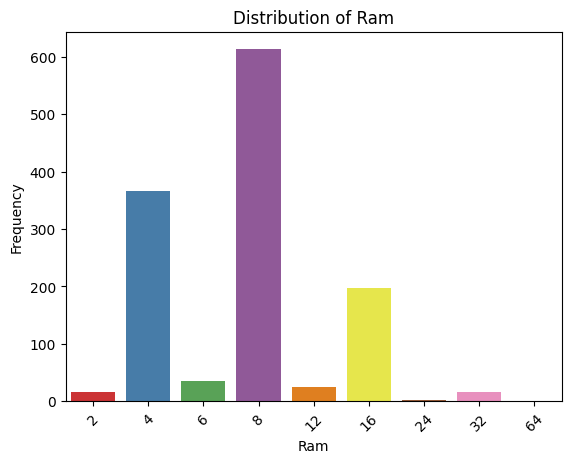

In [12]:
sns.countplot(df,x='Ram',palette='Set1')
plt.title('Distribution of Ram')
plt.xlabel('Ram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_17548\1632451064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='OS',palette='Set1')


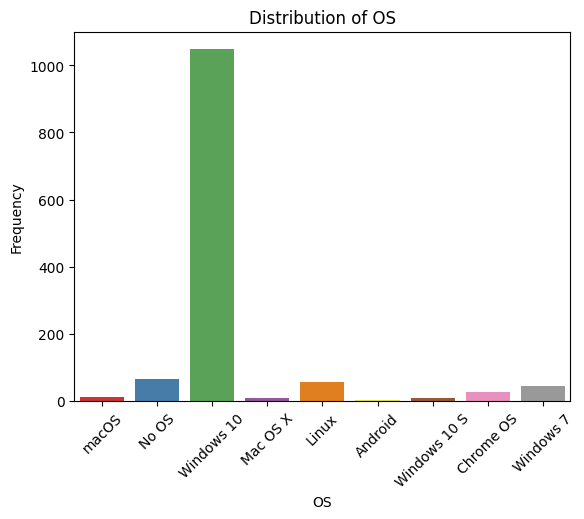

In [13]:
sns.countplot(df,x='OS',palette='Set1')
plt.title('Distribution of OS')
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_17548\1641240673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Screen',palette='Set1')


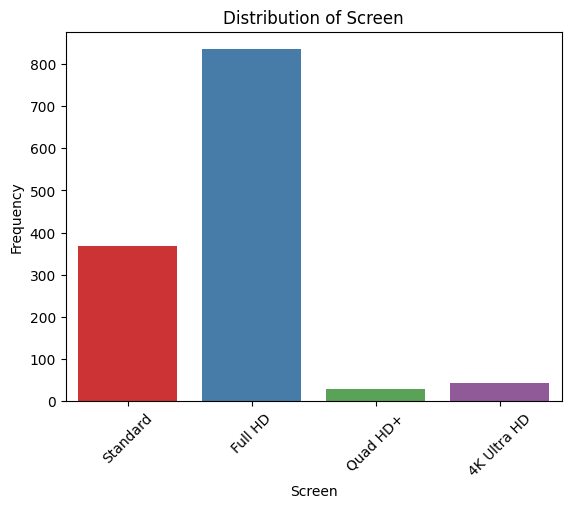

In [14]:
sns.countplot(df,x='Screen',palette='Set1')
plt.title('Distribution of Screen')
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Price_euros', ylabel='Count'>

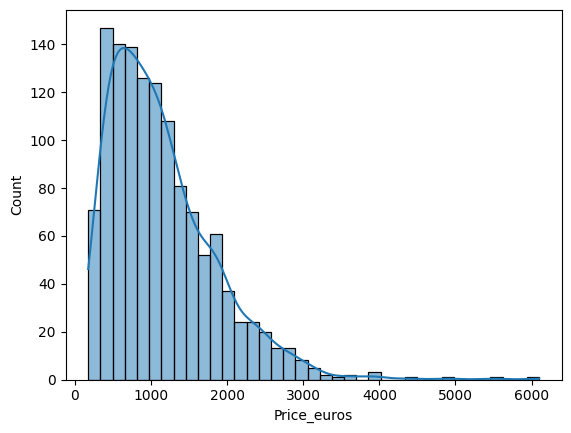

In [15]:
sns.histplot(df['Price_euros'], kde=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

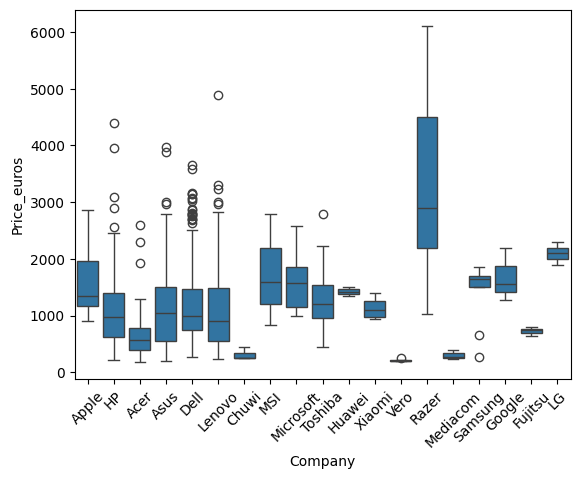

In [16]:
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)

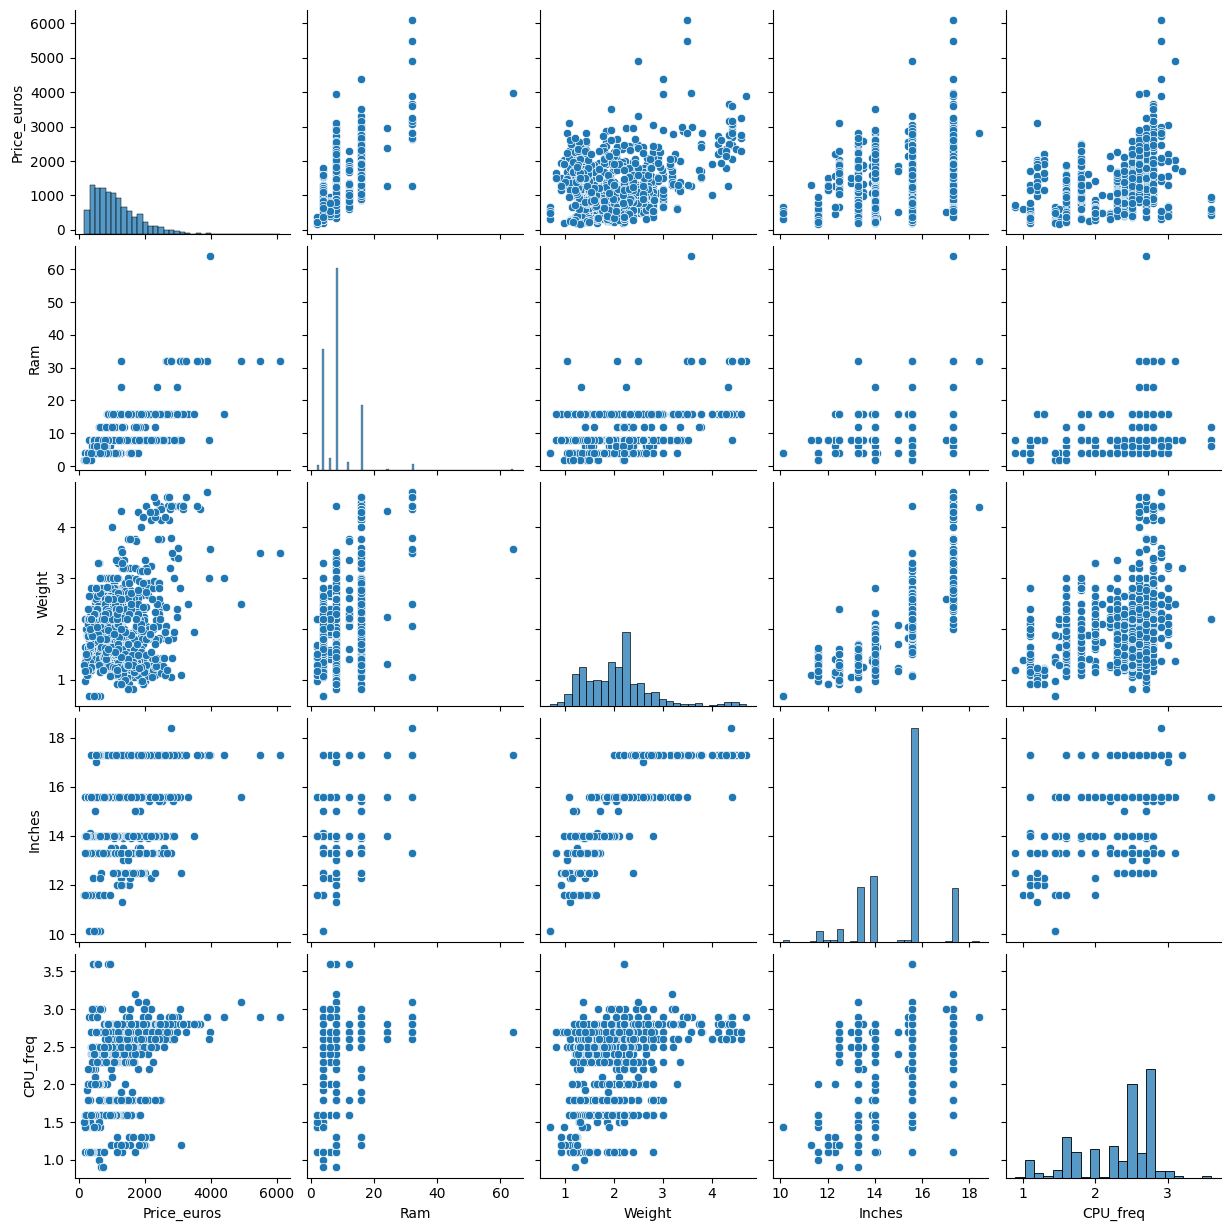

In [17]:
sns.pairplot(df[['Price_euros', 'Ram', 'Weight', 'Inches', 'CPU_freq']])

<Axes: xlabel='Inches', ylabel='Price_euros'>

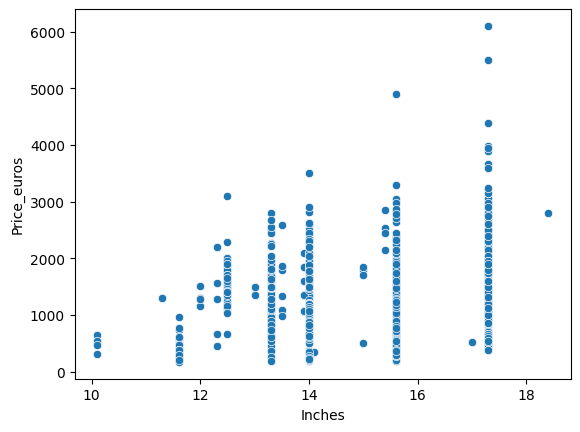

In [18]:
sns.scatterplot(x='Inches', y='Price_euros', data=df)

## Feature Processing or Selection

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [20]:
df.loc[0]

Company                                  Apple
Product                            MacBook Pro
TypeName                             Ultrabook
Inches                                    13.3
Ram                                          8
OS                                       macOS
Weight                                    1.37
Price_euros                            1339.69
Screen                                Standard
ScreenW                                   2560
ScreenH                                   1600
Touchscreen                                 No
IPSpanel                                   Yes
RetinaDisplay                              Yes
CPU_company                              Intel
CPU_freq                                   2.3
CPU_model                              Core i5
PrimaryStorage                             128
SecondaryStorage                             0
PrimaryStorageType                         SSD
SecondaryStorageType                        No
GPU_company  

In [21]:
# Dropping the waste columns.
df.drop(columns=['Product','GPU_model'],inplace=True)

Converting resolution and Inches to ppi(pixels per Inch)

In [22]:
df['ppi'] = (((df['ScreenW']**2) + (df['ScreenH']**2))**0.5 / df['Inches']).astype('float')

In [23]:
df.drop(columns=['ScreenW','ScreenH','Inches'],inplace=True)

In [24]:
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')
df['CPU_freq']=df['CPU_freq'].astype('float')

In [25]:
df.loc[0]

Company                      Apple
TypeName                 Ultrabook
Ram                              8
OS                           macOS
Weight                        1.37
Price_euros                1339.69
Screen                    Standard
Touchscreen                     No
IPSpanel                       Yes
RetinaDisplay                  Yes
CPU_company                  Intel
CPU_freq                       2.3
CPU_model                  Core i5
PrimaryStorage                 128
SecondaryStorage                 0
PrimaryStorageType             SSD
SecondaryStorageType            No
GPU_company                  Intel
ppi                     226.983005
Name: 0, dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Ram                   1275 non-null   int32  
 3   OS                    1275 non-null   object 
 4   Weight                1275 non-null   float64
 5   Price_euros           1275 non-null   float64
 6   Screen                1275 non-null   object 
 7   Touchscreen           1275 non-null   object 
 8   IPSpanel              1275 non-null   object 
 9   RetinaDisplay         1275 non-null   object 
 10  CPU_company           1275 non-null   object 
 11  CPU_freq              1275 non-null   float64
 12  CPU_model             1275 non-null   object 
 13  PrimaryStorage        1275 non-null   int64  
 14  SecondaryStorage      1275 non-null   int64  
 15  PrimaryStorageType   

In [27]:
df['CPU_model'].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [28]:
df['CPU']=df['CPU_model'].apply(lambda x:" ".join(x.split()[0:2]))

In [29]:
df['CPU'].unique()

array(['Core i5', 'Core i7', 'A9-Series 9420', 'Core i3', 'Core M',
       'Atom x5-Z8350', 'E-Series E2-9000e', 'Atom x5-Z8300',
       'E-Series E2-6110', 'A6-Series 9220', 'Celeron Dual', 'Ryzen 1700',
       'Pentium Quad', 'Atom x5-Z8550', 'FX 9830P', 'E-Series 6110',
       'Xeon E3-1505M', 'E-Series 9000e', 'A10-Series A10-9620P',
       'A6-Series A6-9220', 'A10-Series 9600P', 'A8-Series 7410',
       'A12-Series 9720P', 'Celeron Quad', 'Ryzen 1600',
       'A10-Series 9620P', 'E-Series 7110', 'A9-Series A9-9420',
       'Xeon E3-1535M', 'E-Series E2-9000', 'A6-Series 7310',
       'Atom Z8350', 'Pentium Dual', 'A12-Series 9700P', 'A4-Series 7210',
       'FX 8800P', 'Atom X5-Z8350', 'Cortex A72&A53', 'E-Series 9000',
       'A9-Series 9410'], dtype=object)

In [30]:
# minimizing classes for CPU.
def fetch_processor(text):
    if 'Core i7' in text:
        return 'Core i7'
    elif 'Core i5' in text:
        return 'Core i5'
    elif 'Core i3' in text:
        return 'Core i3'
    elif 'Intel' in text or 'Celeron' in text or 'Pentium' in text or 'Atom' in text or 'Xeon' in text:
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [31]:
df['CPU']=df['CPU'].apply(fetch_processor)

<Axes: xlabel='CPU'>

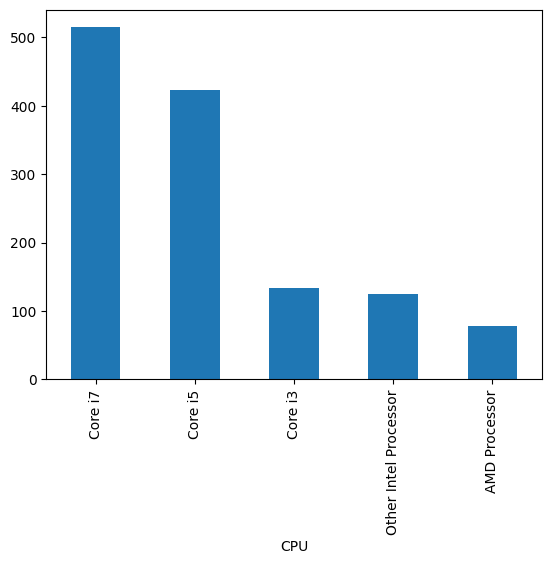

In [32]:
df['CPU'].value_counts().plot(kind='bar')

In [33]:
df.loc[0]

Company                      Apple
TypeName                 Ultrabook
Ram                              8
OS                           macOS
Weight                        1.37
Price_euros                1339.69
Screen                    Standard
Touchscreen                     No
IPSpanel                       Yes
RetinaDisplay                  Yes
CPU_company                  Intel
CPU_freq                       2.3
CPU_model                  Core i5
PrimaryStorage                 128
SecondaryStorage                 0
PrimaryStorageType             SSD
SecondaryStorageType            No
GPU_company                  Intel
ppi                     226.983005
CPU                        Core i5
Name: 0, dtype: object

In [34]:
df.drop(columns=['CPU_company','CPU_model'],inplace=True)

In [35]:
df['OS'].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [36]:
# Minimizing OS classes.
def simplify_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'Mac'
    elif os == 'Linux':
        return 'Linux'
    elif os == 'Chrome OS':
        return 'Chrome OS'
    elif os == 'No OS':
        return 'No OS'
    else:
        return 'Others'

In [37]:
df['Simplified_OS'] = df['OS'].apply(simplify_os)

In [38]:
df.drop(columns=['OS'],inplace=True)

In [39]:
df['Touchscreen']=df['Touchscreen'].apply(lambda x: 1 if x=='Yes' else 0)
df['IPSpanel']=df['IPSpanel'].apply(lambda x: 1 if x=='Yes' else 0)
df['RetinaDisplay']=df['RetinaDisplay'].apply(lambda x: 1 if x=='Yes' else 0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   TypeName              1275 non-null   object 
 2   Ram                   1275 non-null   int32  
 3   Weight                1275 non-null   float64
 4   Price_euros           1275 non-null   float64
 5   Screen                1275 non-null   object 
 6   Touchscreen           1275 non-null   int64  
 7   IPSpanel              1275 non-null   int64  
 8   RetinaDisplay         1275 non-null   int64  
 9   CPU_freq              1275 non-null   float64
 10  PrimaryStorage        1275 non-null   int64  
 11  SecondaryStorage      1275 non-null   int64  
 12  PrimaryStorageType    1275 non-null   object 
 13  SecondaryStorageType  1275 non-null   object 
 14  GPU_company           1275 non-null   object 
 15  ppi                  

## Splitting the Data

In [41]:
X=df.drop(columns=['Price_euros'])
y=np.log(df['Price_euros'])

In [42]:
X

,Company,TypeName,Ram,Weight,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,ppi,CPU,Simplified_OS
0,Apple,Ultrabook,8,1.37,Standard,0,1,1,2.3,128,0,SSD,No,Intel,226.983005,Core i5,Mac
1,Apple,Ultrabook,8,1.34,Standard,0,0,0,1.8,128,0,Flash Storage,No,Intel,127.677940,Core i5,Mac
2,HP,Notebook,8,1.86,Full HD,0,0,0,2.5,256,0,SSD,No,Intel,141.211998,Core i5,No OS
3,Apple,Ultrabook,16,1.83,Standard,0,1,1,2.7,512,0,SSD,No,AMD,220.534624,Core i7,Mac
4,Apple,Ultrabook,8,1.37,Standard,0,1,1,3.1,256,0,SSD,No,Intel,226.983005,Core i5,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,1.80,Full HD,1,1,0,2.5,128,0,SSD,No,Intel,157.350512,Core i7,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,Quad HD+,1,1,0,2.5,512,0,SSD,No,Intel,276.053530,Core i7,Windows
1272,Lenovo,Notebook,2,1.50,Standard,0,0,0,1.6,64,0,Flash Storage,No,Intel,111.935204,Other Intel Processor,Windows
1273,HP,Notebook,6,2.19,Standard,0,0,0,2.5,1024,0,HDD,No,AMD,100.454670,Core i7,Windows


In [43]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1270    6.458338
1271    7.312553
1272    5.433722
1273    6.638568
1274    5.910797
Name: Price_euros, Length: 1275, dtype: float64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training

In [45]:
# Using Linear Regression.
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,11,12,13,15,16])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8082107683403341
MAE 0.2072853043740505


In [46]:
# Using Random Forest Classifier
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,4,11,12,13,15,16])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8772159415629173
MAE 0.1584154214209694


### Saving the models

In [47]:
pickle.dump(df,open('./model/df.pkl','wb'))
pickle.dump(pipe,open('./model/pipe.pkl','wb'))

### Visualizing Pred VS Actual

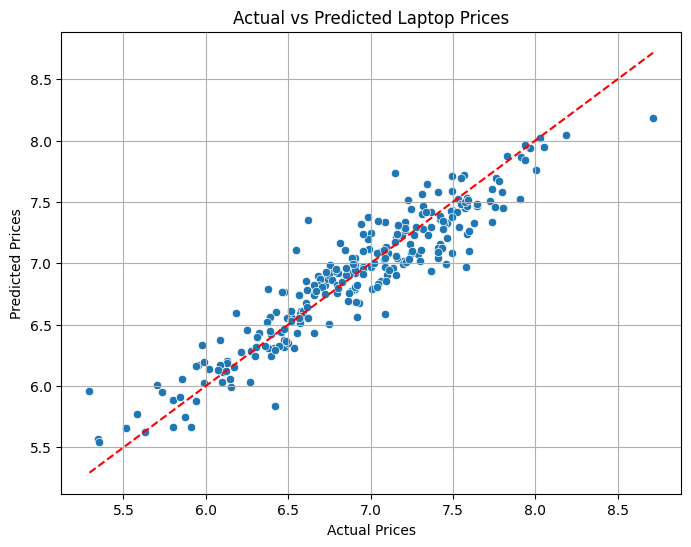

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Laptop Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()
